In [2]:
# Customer Churn Prediction ML Project

In [3]:
import pandas as pd

import numpy as np

In [4]:
df=pd.read_csv("telecom_churn.csv")
# print(df)
print("\nrows and columns are : ")
print(df.shape)


rows and columns are : 
(3333, 11)


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Churn            3333 non-null   int64  
 1   AccountWeeks     3333 non-null   int64  
 2   ContractRenewal  3333 non-null   int64  
 3   DataPlan         3333 non-null   int64  
 4   DataUsage        3333 non-null   float64
 5   CustServCalls    3333 non-null   int64  
 6   DayMins          3333 non-null   float64
 7   DayCalls         3333 non-null   int64  
 8   MonthlyCharge    3333 non-null   float64
 9   OverageFee       3333 non-null   float64
 10  RoamMins         3333 non-null   float64
dtypes: float64(5), int64(6)
memory usage: 286.6 KB


In [6]:
# finding the duplicate rows 
print("Number of duplicate rows in dataset are : ",df.duplicated().sum())

Number of duplicate rows in dataset are :  0


In [7]:
# finding the mean, median, mode, SD, and other necessary values 

print(df.describe())

             Churn  AccountWeeks  ContractRenewal     DataPlan    DataUsage  \
count  3333.000000   3333.000000      3333.000000  3333.000000  3333.000000   
mean      0.144914    101.064806         0.903090     0.276628     0.816475   
std       0.352067     39.822106         0.295879     0.447398     1.272668   
min       0.000000      1.000000         0.000000     0.000000     0.000000   
25%       0.000000     74.000000         1.000000     0.000000     0.000000   
50%       0.000000    101.000000         1.000000     0.000000     0.000000   
75%       0.000000    127.000000         1.000000     1.000000     1.780000   
max       1.000000    243.000000         1.000000     1.000000     5.400000   

       CustServCalls      DayMins     DayCalls  MonthlyCharge   OverageFee  \
count    3333.000000  3333.000000  3333.000000    3333.000000  3333.000000   
mean        1.562856   179.775098   100.435644      56.305161    10.051488   
std         1.315491    54.467389    20.069084      16

In [8]:
# the independent variables

b=df[['AccountWeeks','ContractRenewal','DataPlan','DataUsage','CustServCalls','DayMins','DayCalls','MonthlyCharge','OverageFee','RoamMins']].values
# we are interested only in the values
print(b)

[[128.     1.     1.   ...  89.     9.87  10.  ]
 [107.     1.     1.   ...  82.     9.78  13.7 ]
 [137.     1.     0.   ...  52.     6.06  12.2 ]
 ...
 [ 28.     1.     0.   ...  56.    14.44  14.1 ]
 [184.     0.     0.   ...  50.     7.98   5.  ]
 [ 74.     1.     1.   ... 100.    13.3   13.7 ]]


In [9]:
# Dependent variable 
a=df['Churn'].values
a

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [10]:
print(df.corr())

                    Churn  AccountWeeks  ContractRenewal  DataPlan  DataUsage  \
Churn            1.000000      0.016541        -0.259852 -0.102148  -0.087195   
AccountWeeks     0.016541      1.000000        -0.024735  0.002918   0.014391   
ContractRenewal -0.259852     -0.024735         1.000000 -0.006006  -0.019223   
DataPlan        -0.102148      0.002918        -0.006006  1.000000   0.945982   
DataUsage       -0.087195      0.014391        -0.019223  0.945982   1.000000   
CustServCalls    0.208750     -0.003796         0.024522 -0.017824  -0.021723   
DayMins          0.205151      0.006216        -0.049396 -0.001684   0.003176   
DayCalls         0.018459      0.038470        -0.003755 -0.011086  -0.007962   
MonthlyCharge    0.072313      0.012581        -0.047291  0.737490   0.781660   
OverageFee       0.092812     -0.006749        -0.019105  0.021526   0.019637   
RoamMins         0.068239      0.009514        -0.045871 -0.001318   0.162746   

                 CustServCa

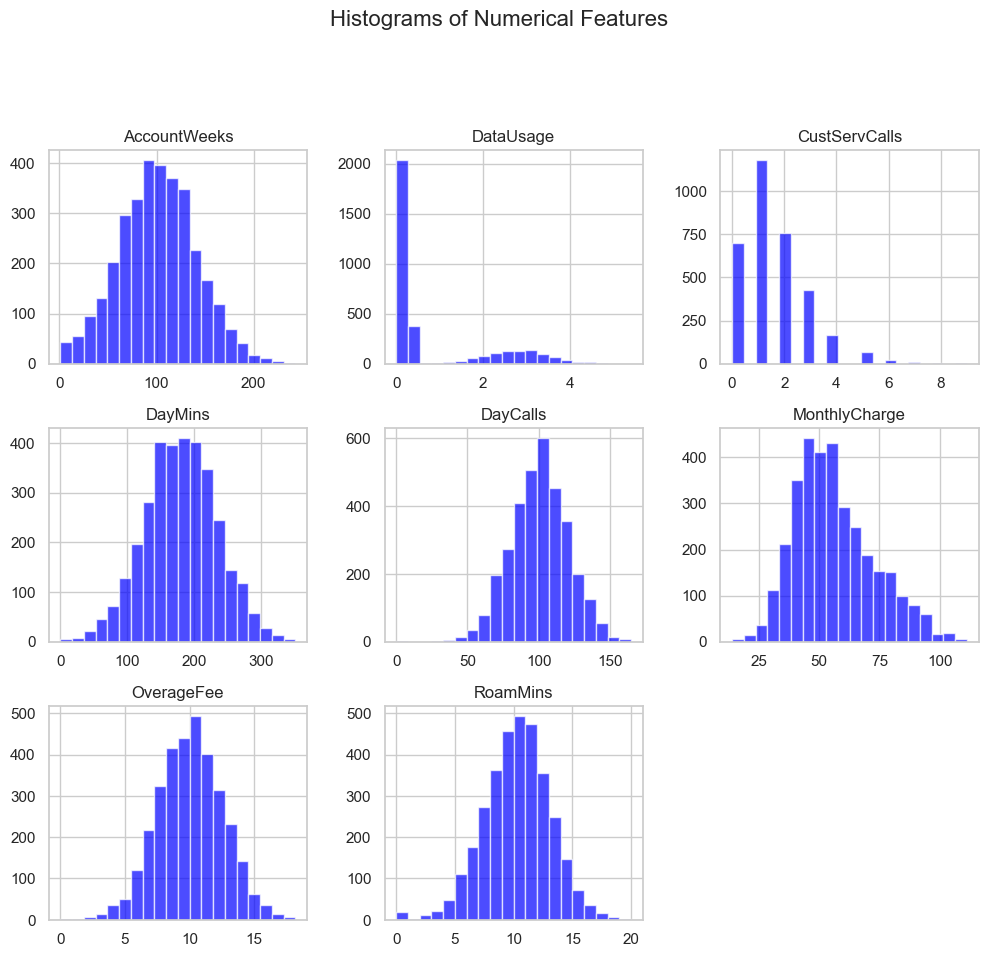

In [11]:
# data visualization

import matplotlib.pyplot as plt
import seaborn as sns

# Set the style for the plots
sns.set(style="whitegrid")

# Plot histograms for numerical features
numerical_features = ['AccountWeeks', 'DataUsage', 'CustServCalls', 'DayMins', 'DayCalls', 'MonthlyCharge', 'OverageFee', 'RoamMins']
df[numerical_features].hist(figsize=(12, 10), bins=20, color='blue', alpha=0.7)
plt.suptitle("Histograms of Numerical Features", y=1.02, fontsize=16)
plt.show()

C:\Users\Pranay\AppData\Local\Temp\ipykernel_13336\302810943.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Churn', data=df, palette='pastel')


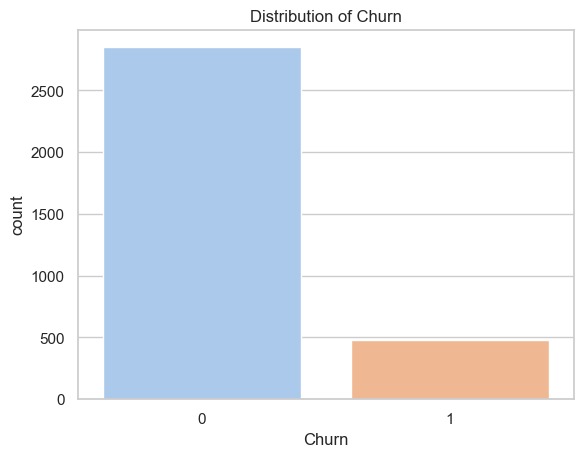

In [12]:
# Plot a bar plot for the target variable 'Churn'

sns.countplot(x='Churn', data=df, palette='pastel')
plt.title("Distribution of Churn")
plt.show()

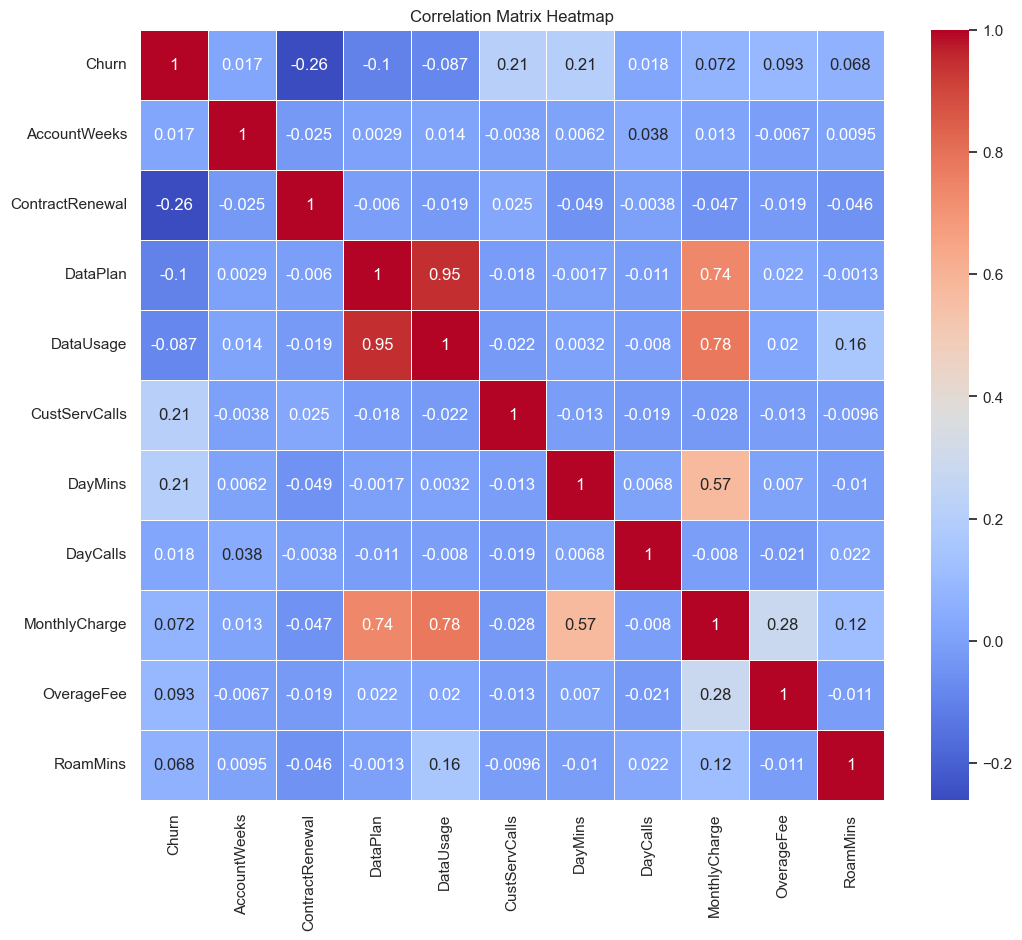

In [13]:
# Plotting a correlation matrix heatmap
plt.figure(figsize=(12, 10))
correlation_matrix = df.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title("Correlation Matrix Heatmap")
plt.show()

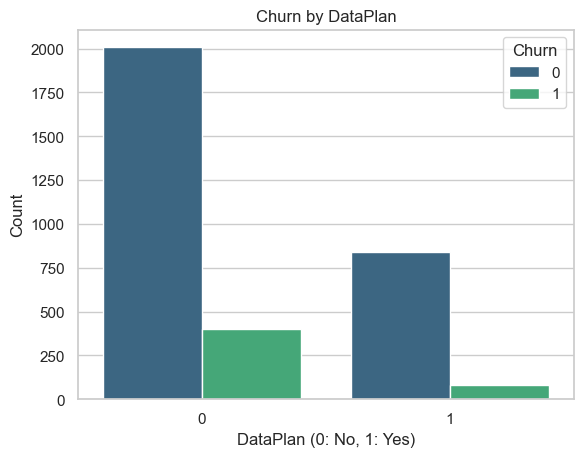

In [14]:
# Visualize the relationship between 'DataPlan' and 'Churn'

sns.countplot(x='DataPlan', hue='Churn', data=df, palette='viridis')
plt.title("Churn by DataPlan")
plt.xlabel("DataPlan (0: No, 1: Yes)")
plt.ylabel("Count")
plt.show()

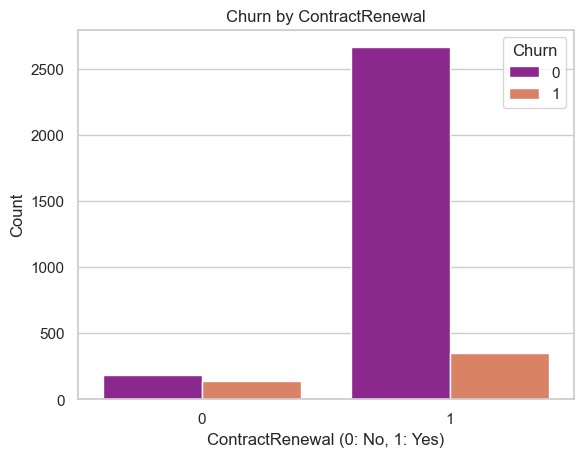

In [15]:
# Visualize the relationship between 'ContractRenewal' and 'Churn'

sns.countplot(x='ContractRenewal', hue='Churn', data=df, palette='plasma')
plt.title("Churn by ContractRenewal")
plt.xlabel("ContractRenewal (0: No, 1: Yes)")
plt.ylabel("Count")
plt.show()

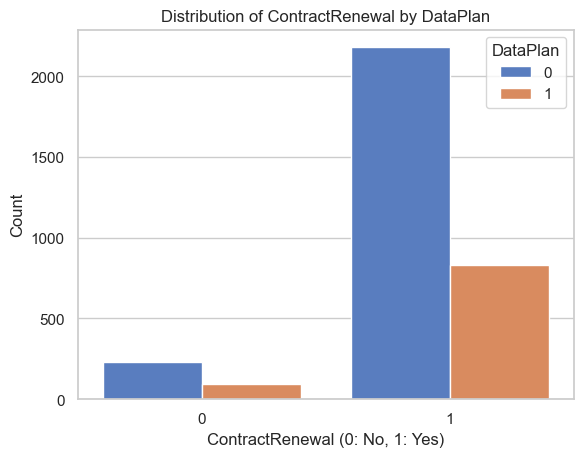

In [16]:
# Visualize the distribution of 'ContractRenewal' by 'DataPlan'

sns.countplot(x='ContractRenewal', hue='DataPlan', data=df, palette='muted')
plt.title("Distribution of ContractRenewal by DataPlan")
plt.xlabel("ContractRenewal (0: No, 1: Yes)")
plt.ylabel("Count")
plt.show()

C:\Users\Pranay\AppData\Roaming\Python\Python311\site-packages\seaborn\axisgrid.py:1513: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  func(x=vector, **plot_kwargs)
C:\Users\Pranay\AppData\Roaming\Python\Python311\site-packages\seaborn\axisgrid.py:1513: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  func(x=vector, **plot_kwargs)
C:\Users\Pranay\AppData\Roaming\Python\Python311\site-packages\seaborn\axisgrid.py:1513: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  func(x=vector, **plot_kwargs)
C:\Users\Pranay\AppData\Roaming\Python\Python311\site-packages\seaborn\axisgrid.py:1615: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  func(x=x, y=y, **kwargs)
C:\Users\Pranay\AppData\Roaming\Python\Python311\site-packages\seaborn\axisgrid.py:1615: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  func(x=x, y=y, **kwargs)
C:\Users\Pranay\AppD

<Figure size 1200x1000 with 0 Axes>

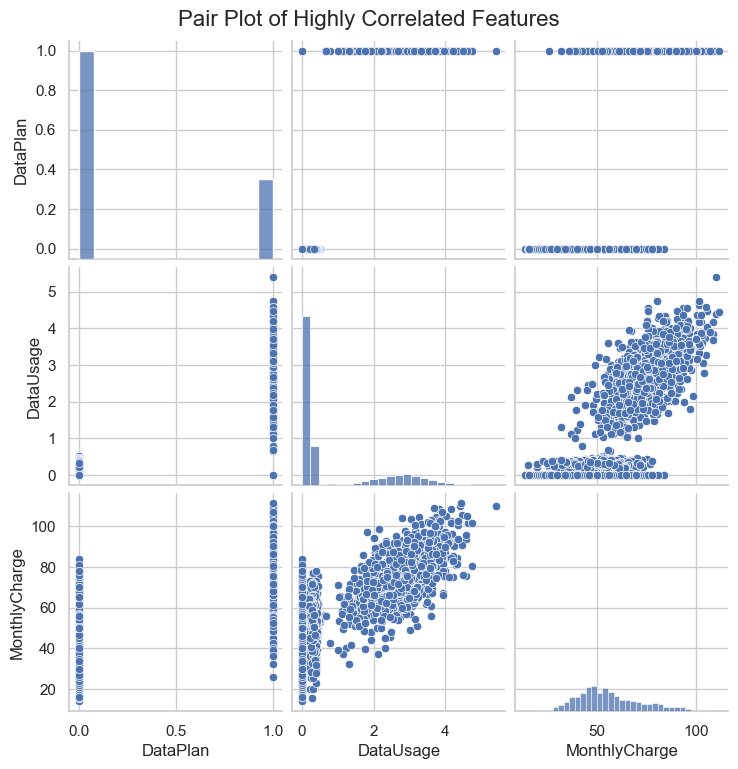

In [17]:
# Select highly correlated features
highly_correlated_features = ['DataPlan', 'DataUsage', 'MonthlyCharge']

# Pair plot for highly correlated features
plt.figure(figsize=(12, 10))
sns.pairplot(df[highly_correlated_features], palette='Dark2')
plt.suptitle("Pair Plot of Highly Correlated Features", y=1.02, fontsize=16)
plt.show()

In [18]:
# Splitting the dataset into training data and testing data

from sklearn.model_selection import train_test_split

X=df.iloc[:, :-1]
y=df.iloc[:, -1]

X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2, random_state=0) # test_size is the percentage in which we want to split , 80-20 in this case
# here, The random state helps us get the same random split each time.


In [19]:
# Testing dataset 
X_test

,Churn,AccountWeeks,ContractRenewal,DataPlan,DataUsage,CustServCalls,DayMins,DayCalls,MonthlyCharge,OverageFee
405,0,92,0,0,0.00,0,264.3,91,59.0,8.05
118,0,112,1,1,2.70,2,113.7,117,60.0,7.88
710,0,69,1,0,0.29,3,195.3,70,54.9,10.84
499,0,95,1,0,0.00,1,175.2,91,51.0,12.22
2594,1,115,0,0,0.00,1,345.3,81,76.0,10.17
...,...,...,...,...,...,...,...,...,...,...
2255,0,166,1,0,0.00,0,136.1,116,39.0,9.07
242,0,36,1,0,0.25,1,253.4,77,61.5,9.12
1916,0,72,1,0,0.00,1,175.5,103,42.0,6.62
2160,1,94,0,0,0.00,1,89.5,94,45.0,17.00


In [20]:
# training dataset
X_train

,Churn,AccountWeeks,ContractRenewal,DataPlan,DataUsage,CustServCalls,DayMins,DayCalls,MonthlyCharge,OverageFee
1460,0,80,1,0,0.00,3,198.1,160,47.0,7.84
2000,0,28,1,0,0.00,3,168.2,87,43.0,8.09
666,0,120,1,0,0.00,2,252.0,120,56.0,7.51
2962,0,105,1,0,0.00,1,251.6,88,58.0,8.76
2773,1,134,1,1,1.65,2,247.2,105,78.5,11.28
...,...,...,...,...,...,...,...,...,...,...
835,0,27,1,0,0.00,1,72.7,75,31.0,10.43
3264,0,89,1,1,1.59,0,97.8,98,50.9,10.36
1653,1,93,0,0,0.00,1,131.4,78,42.0,10.99
2607,0,91,1,0,0.00,3,189.3,100,53.0,11.97


In [21]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Load your dataset
# Assuming your dataframe is named 'df'
# If not, replace 'df' with the actual name of your dataframe
# You already have your data preprocessed, so you can skip this step if it's already loaded

# Explore your data
df.describe()

# Split your data into features (X) and target variable (y)
X = df.drop('Churn', axis=1)
y = df['Churn']

# Split your data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Feature Scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Train your Logistic Regression model
model = LogisticRegression()
model.fit(X_train_scaled, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test_scaled)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

print(f'Accuracy: {accuracy}')
print(f'Confusion Matrix:\n{conf_matrix}')
print(f'Classification Report:\n{class_report}')


# Set your custom threshold (e.g., 0.6)
custom_threshold = 0.6

# Get predicted probabilities
y_prob = model.predict_proba(X_test_scaled)[:, 1]


# Make predictions based on the custom threshold
y_pred_custom = (y_prob >= custom_threshold).astype(int)

# Map predicted labels to human-readable messages
prediction_messages = {0: "Customer will continue services", 1: "Customer will stop using company services"}

# Display predictions
for idx, pred in enumerate(y_pred_custom):
    print(f"Prediction for instance {idx + 1}: {prediction_messages[pred]} (Probability: {y_prob[idx]:.4f})")



Accuracy: 0.8590704647676162
Confusion Matrix:
[[555  11]
 [ 83  18]]
Classification Report:
              precision    recall  f1-score   support

           0       0.87      0.98      0.92       566
           1       0.62      0.18      0.28       101

    accuracy                           0.86       667
   macro avg       0.75      0.58      0.60       667
weighted avg       0.83      0.86      0.82       667

[[ 0.31148552  0.32662405 -0.61116185 ... -0.06650584  2.56199045
   1.16665668]
 [-0.85263157  0.32662405 -0.61116185 ... -1.10997945  0.32854897
   0.91633594]
 [-0.06811788  0.32662405 -0.61116185 ... -2.58311866 -0.81184783
  -1.2292704 ]
 ...
 [ 1.19722679  0.32662405  1.63622779 ...  0.71303032 -0.79211778
  -0.12070712]
 [-0.65017643  0.32662405  1.63622779 ... -0.41637641  0.11941046
  -2.15903315]
 [ 0.08372348  0.32662405 -0.61116185 ... -0.86445625 -0.89471403
   0.16537372]]
Prediction for instance 1: Customer will continue services (Probability: 0.1488)
Predict

In [22]:
# Support Vector Machine

# Import necessary libraries
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Create and train the SVM model with an RBF kernel
svm_model_rbf = SVC(kernel='rbf', C=1.0, gamma='scale')  # Adjust C and gamma as needed
svm_model_rbf.fit(X_train_scaled, y_train)

# Make predictions on the test set
y_pred_svm_rbf = svm_model_rbf.predict(X_test_scaled)

# Map predicted labels to human-readable messages
prediction_messages_rbf = {0: "Customer will continue services", 1: "Customer will stop using company services"}

# Display predictions along with evaluation metrics
for idx, pred in enumerate(y_pred_svm_rbf):
    print(f"Prediction for instance {idx + 1}: {prediction_messages_rbf[pred]}")
    print()

# Evaluate the SVM model with an RBF kernel
accuracy_svm_rbf = accuracy_score(y_test, y_pred_svm_rbf)
conf_matrix_svm_rbf = confusion_matrix(y_test, y_pred_svm_rbf)
class_report_svm_rbf = classification_report(y_test, y_pred_svm_rbf)

print(f'SVM with RBF Kernel Accuracy: {accuracy_svm_rbf}')
print(f'SVM with RBF Kernel Confusion Matrix:\n{conf_matrix_svm_rbf}')
print(f'SVM with RBF Kernel Classification Report:\n{class_report_svm_rbf}')

# Create and train the SVM model with a Polynomial kernel
svm_model_poly = SVC(kernel='poly', C=1.0, degree=3)  # Adjust C and degree as needed
svm_model_poly.fit(X_train_scaled, y_train)

# Make predictions on the test set
y_pred_svm_poly = svm_model_poly.predict(X_test_scaled)

# Map predicted labels to human-readable messages
prediction_messages_poly = {0: "Customer will continue services", 1: "Customer will stop using company services"}

# Display predictions along with evaluation metrics
for idx, pred in enumerate(y_pred_svm_poly):
    print(f"Prediction for instance {idx + 1}: {prediction_messages_poly[pred]}")
    print()

# Evaluate the SVM model with a Polynomial kernel
accuracy_svm_poly = accuracy_score(y_test, y_pred_svm_poly)
conf_matrix_svm_poly = confusion_matrix(y_test, y_pred_svm_poly)
class_report_svm_poly = classification_report(y_test, y_pred_svm_poly)

print(f'SVM with Polynomial Kernel Accuracy: {accuracy_svm_poly}')
print(f'SVM with Polynomial Kernel Confusion Matrix:\n{conf_matrix_svm_poly}')
print(f'SVM with Polynomial Kernel Classification Report:\n{class_report_svm_poly}')


Prediction for instance 1: Customer will continue services

Prediction for instance 2: Customer will continue services

Prediction for instance 3: Customer will continue services

Prediction for instance 4: Customer will continue services

Prediction for instance 5: Customer will continue services

Prediction for instance 6: Customer will continue services

Prediction for instance 7: Customer will continue services

Prediction for instance 8: Customer will continue services

Prediction for instance 9: Customer will continue services

Prediction for instance 10: Customer will continue services

Prediction for instance 11: Customer will continue services

Prediction for instance 12: Customer will continue services

Prediction for instance 13: Customer will continue services

Prediction for instance 14: Customer will stop using company services

Prediction for instance 15: Customer will continue services

Prediction for instance 16: Customer will continue services

Prediction for instance

In [23]:
# Support Vector Machine

# Import necessary libraries
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Create and train the SVM model with an RBF kernel
svm_model_rbf = SVC(kernel='rbf', C=1.0, gamma='scale')  # Adjust C and gamma as needed
svm_model_rbf.fit(X_train_scaled, y_train)

# Make predictions on the test set
y_pred_svm_rbf = svm_model_rbf.predict(X_test_scaled)

# Get decision values for the test set
decision_values_rbf = svm_model_rbf.decision_function(X_test_scaled)

# Set your custom threshold
custom_threshold_rbf = 0.0  # Adjust the threshold as needed

# Make predictions based on the custom threshold
y_pred_svm_custom_rbf = (decision_values_rbf >= custom_threshold_rbf).astype(int)

# Map predicted labels to human-readable messages
prediction_messages_custom_rbf = {0: "Customer will continue services", 1: "Customer will stop using company services"}

# Display predictions along with evaluation metrics
for idx, pred in enumerate(y_pred_svm_custom_rbf):
    print(f"Prediction for instance {idx + 1}: {prediction_messages_custom_rbf[pred]} (Decision Value: {decision_values_rbf[idx]:.4f})")
    print()

# Evaluate the SVM model with an RBF kernel
accuracy_svm_custom_rbf = accuracy_score(y_test, y_pred_svm_custom_rbf)
conf_matrix_svm_custom_rbf = confusion_matrix(y_test, y_pred_svm_custom_rbf)
class_report_svm_custom_rbf = classification_report(y_test, y_pred_svm_custom_rbf)

print(f'SVM with RBF Kernel Accuracy (Custom Threshold): {accuracy_svm_custom_rbf}')
print(f'SVM with RBF Kernel Confusion Matrix (Custom Threshold):\n{conf_matrix_svm_custom_rbf}')
print(f'SVM with RBF Kernel Classification Report (Custom Threshold):\n{class_report_svm_custom_rbf}')


# ******************************************************************


# Create and train the SVM model with a Polynomial kernel
svm_model_poly = SVC(kernel='poly', C=1.0, degree=3)  # Adjust C and degree as needed
svm_model_poly.fit(X_train_scaled, y_train)

# Make predictions on the test set
y_pred_svm_poly = svm_model_poly.predict(X_test_scaled)

# Get decision values for the test set
decision_values_poly = svm_model_poly.decision_function(X_test_scaled)

# Set your custom threshold
custom_threshold_poly = 0.0  # Adjust the threshold as needed

# Make predictions based on the custom threshold
y_pred_svm_custom_poly = (decision_values_poly >= custom_threshold_poly).astype(int)

# Map predicted labels to human-readable messages
prediction_messages_custom_poly = {0: "Customer will continue services", 1: "Customer will stop using company services"}

# Display predictions along with evaluation metrics
for idx, pred in enumerate(y_pred_svm_custom_poly):
    print(f"Prediction for instance {idx + 1}: {prediction_messages_custom_poly[pred]} (Decision Value: {decision_values_poly[idx]:.4f})")
    print()

# Evaluate the SVM model with a Polynomial kernel
accuracy_svm_custom_poly = accuracy_score(y_test, y_pred_svm_custom_poly)
conf_matrix_svm_custom_poly = confusion_matrix(y_test, y_pred_svm_custom_poly)
class_report_svm_custom_poly = classification_report(y_test, y_pred_svm_custom_poly)

print(f'SVM with Polynomial Kernel Accuracy (Custom Threshold): {accuracy_svm_custom_poly}')
print(f'SVM with Polynomial Kernel Confusion Matrix (Custom Threshold):\n{conf_matrix_svm_custom_poly}')
print(f'SVM with Polynomial Kernel Classification Report (Custom Threshold):\n{class_report_svm_custom_poly}')


Prediction for instance 1: Customer will continue services (Decision Value: -1.1430)

Prediction for instance 2: Customer will continue services (Decision Value: -1.2800)

Prediction for instance 3: Customer will continue services (Decision Value: -0.0106)

Prediction for instance 4: Customer will continue services (Decision Value: -1.4887)

Prediction for instance 5: Customer will continue services (Decision Value: -2.0348)

Prediction for instance 6: Customer will continue services (Decision Value: -1.3616)

Prediction for instance 7: Customer will continue services (Decision Value: -1.1877)

Prediction for instance 8: Customer will continue services (Decision Value: -1.1582)

Prediction for instance 9: Customer will continue services (Decision Value: -1.3340)

Prediction for instance 10: Customer will continue services (Decision Value: -1.4244)

Prediction for instance 11: Customer will continue services (Decision Value: -1.0959)

Prediction for instance 12: Customer will continue s

In [24]:
# Decision tree Algorithm

# Import necessary libraries
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Create and train the Decision Tree model
decision_tree_model = DecisionTreeClassifier(random_state=42)  # You can adjust hyperparameters
decision_tree_model.fit(X_train_scaled, y_train)

# Make predictions on the test set
y_pred_decision_tree = decision_tree_model.predict(X_test_scaled)

# Map predicted labels to human-readable messages
prediction_messages_decision_tree = {0: "Customer will continue services", 1: "Customer will stop using company services"}

# Display predictions along with evaluation metrics
for idx, pred in enumerate(y_pred_decision_tree):
    print(f"Prediction for instance {idx + 1} (Decision Tree): {prediction_messages_decision_tree[pred]}")
    print()

# Evaluate the Decision Tree model
accuracy_decision_tree = accuracy_score(y_test, y_pred_decision_tree)
conf_matrix_decision_tree = confusion_matrix(y_test, y_pred_decision_tree)
class_report_decision_tree = classification_report(y_test, y_pred_decision_tree)

print(f'Decision Tree Accuracy: {accuracy_decision_tree}')
print(f'Decision Tree Confusion Matrix:\n{conf_matrix_decision_tree}')
print(f'Decision Tree Classification Report:\n{class_report_decision_tree}')


Prediction for instance 1 (Decision Tree): Customer will continue services

Prediction for instance 2 (Decision Tree): Customer will continue services

Prediction for instance 3 (Decision Tree): Customer will stop using company services

Prediction for instance 4 (Decision Tree): Customer will continue services

Prediction for instance 5 (Decision Tree): Customer will continue services

Prediction for instance 6 (Decision Tree): Customer will continue services

Prediction for instance 7 (Decision Tree): Customer will continue services

Prediction for instance 8 (Decision Tree): Customer will continue services

Prediction for instance 9 (Decision Tree): Customer will continue services

Prediction for instance 10 (Decision Tree): Customer will continue services

Prediction for instance 11 (Decision Tree): Customer will continue services

Prediction for instance 12 (Decision Tree): Customer will continue services

Prediction for instance 13 (Decision Tree): Customer will continue services

In [25]:
# Random Forest Alogorithm

# Import necessary libraries
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Create and train the Random Forest model
random_forest_model = RandomForestClassifier(n_estimators=100, random_state=42)  # You can adjust hyperparameters
random_forest_model.fit(X_train_scaled, y_train)

# Make predictions on the test set
y_pred_random_forest = random_forest_model.predict(X_test_scaled)

# Map predicted labels to human-readable messages
prediction_messages_random_forest = {0: "Customer will continue services", 1: "Customer will stop using company services"}

# Display predictions along with evaluation metrics
for idx, pred in enumerate(y_pred_random_forest):
    print(f"Prediction for instance {idx + 1} (Random Forest): {prediction_messages_random_forest[pred]}")
    print()

# Evaluate the Random Forest model
accuracy_random_forest = accuracy_score(y_test, y_pred_random_forest)
conf_matrix_random_forest = confusion_matrix(y_test, y_pred_random_forest)
class_report_random_forest = classification_report(y_test, y_pred_random_forest)

print(f'Random Forest Accuracy: {accuracy_random_forest}')
print(f'Random Forest Confusion Matrix:\n{conf_matrix_random_forest}')
print(f'Random Forest Classification Report:\n{class_report_random_forest}')


Prediction for instance 1 (Random Forest): Customer will continue services

Prediction for instance 2 (Random Forest): Customer will continue services

Prediction for instance 3 (Random Forest): Customer will stop using company services

Prediction for instance 4 (Random Forest): Customer will continue services

Prediction for instance 5 (Random Forest): Customer will continue services

Prediction for instance 6 (Random Forest): Customer will continue services

Prediction for instance 7 (Random Forest): Customer will continue services

Prediction for instance 8 (Random Forest): Customer will continue services

Prediction for instance 9 (Random Forest): Customer will continue services

Prediction for instance 10 (Random Forest): Customer will continue services

Prediction for instance 11 (Random Forest): Customer will continue services

Prediction for instance 12 (Random Forest): Customer will continue services

Prediction for instance 13 (Random Forest): Customer will continue services